# Introduction to 1D/2D shape functions

- [x] 1d lagrange shape functions
- [x] 2d lagrange shape functions
- [x] calculation/interpolation in 1D/2D

Author  : Yang Bai @ M3 Group

Date    : 2021.12.25

QQ group: 628204857

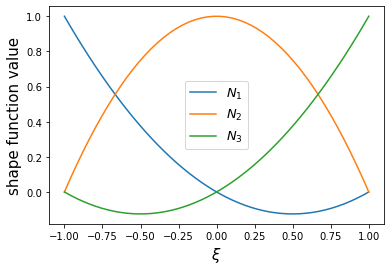

In [1]:
from FEToy.fe.shapefun import shape1d

my1dshp=shape1d(meshtype='edge4') # order=2
my1dshp.setmeshtype('edge3')
my1dshp.update()
my1dshp.plot()

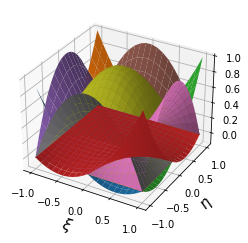

In [2]:
from FEToy.fe.shapefun import shape2d

my2dshp=shape2d(meshtype='quad9') # support for quad4 + quad9
my2dshp.plot()

In the current element, all the quantities can be calculated by $u(\vec{\xi})=\sum_{i}^{n}N_{i}(\vec{\xi})u_{i}$, where $N_{i}$ is the i-th node's shape function, and $u_{i}$ is the solution of i-th node. $\vec{\xi}$ is the local coordinates.

elemental nodes: [0.  0.4]
xgp=0.23
elemental nodes: [0.4 0.8]
xgp=0.63
elemental nodes: [0.8 1.2]
xgp=1.03
elemental nodes: [1.2 1.6]
xgp=1.43
elemental nodes: [1.6 2. ]
xgp=1.83


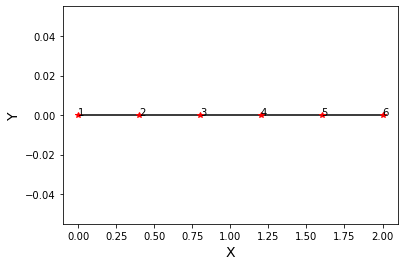

In [3]:
from FEToy.mesh.lagrange1dmesh import mesh1d # before we create the mesh, we need to import mesh module

my1dmesh=mesh1d(meshtype='edge2',nx=5,xmin=0.0,xmax=2.0)
my1dmesh.createmesh() # generate your 1d mesh
my1dmesh.plotmesh(withnode=True,withnodeid=True)

my1dshp.setmeshtype('edge2')
my1dshp.update()

# do the element loop for our calculation
for e in range(my1dmesh.elements):
    elconn=my1dmesh.elementconn[e,:]-1 # get the e-th element's connectivity information
    x=my1dmesh.nodecoords[elconn] # index start from 0
    xi= 0.15 # local coordinate(xi, not x!) for gauss point integration, it varies from -1 to 1
    shp_val,shp_grad,J=my1dshp.calc(xi,x) # calculate the shape function value 
                                          # and its derivative of the current gauss point
    xgp=0.0 # coordinate of current gauss point
    print('elemental nodes:',x)
    for i in range(my1dshp.getshpnumber()):
        xgp+=shp_val[i]*x[i]
    print('xgp=%g'%(xgp))
    

nodes X is: [0. 1. 1. 0.]
nodes Y is: [0. 0. 1. 1.]
xgp=0.55, ygp=0.45
nodes X is: [1. 2. 2. 1.]
nodes Y is: [0. 0. 1. 1.]
xgp=1.55, ygp=0.45
nodes X is: [0. 1. 1. 0.]
nodes Y is: [1. 1. 2. 2.]
xgp=0.55, ygp=1.45
nodes X is: [1. 2. 2. 1.]
nodes Y is: [1. 1. 2. 2.]
xgp=1.55, ygp=1.45


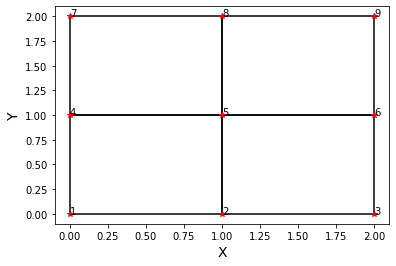

In [4]:
from FEToy.mesh.lagrange2dmesh import mesh2d

my2dmesh=mesh2d(meshtype='quad4',nx=2,ny=2) # 2x2 in [0,1]x[0,1] domain
my2dmesh.createmesh()
my2dmesh.plotmesh(withnode=True,withnodeid=True)

my2dshp.setmeshtype('quad4')
my2dshp.update()


for e in range(my2dmesh.elements):
    elconn=my2dmesh.elementconn[e]
    x=my2dmesh.nodecoords[elconn,0] # x-coordinates of nodal points
    y=my2dmesh.nodecoords[elconn,1] # y-coordinates of nodal points
    
    xi=0.1;eta=-0.1 # the local coordinates
    shp_val,shp_grad,J=my2dshp.calc(xi,eta,x,y)
    
    xgp=0.0;ygp=0.0 # coordinate of gauss point
    print('nodes X is:',x)
    print('nodes Y is:',y)
    for i in range(my2dshp.getshpnumber()):
        xgp+=shp_val[i]*x[i]
        ygp+=shp_val[i]*y[i]
    print('xgp=%g, ygp=%g'%(xgp,ygp))